In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ZGlobalLib.gpu_utils import use_gpu
use_gpu(1)

2024-01-28 08:58:09.223401: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')

2024-01-28 08:58:09.688732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9651 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5


In [3]:
from histolungs import *

# Test

# Evaluation

In [4]:
def train_evaluate(class_type, resolution,
                   public_directory = 'data/public_dataset/',
                   root_directory = "data/dataset_2_final/", 
                   test_directory = "data/validation_final_septiembre/",
                   pretrain_dir = None,
                   exclude_pd = False
                  ):
    
    if resolution == 'public':
        root_directory = public_directory
    
    resname = resolution if resolution is not None else 'all'
    
    image_paths = get_files(root_directory, resolution=resolution, exclude_pd=exclude_pd)
    class_names, class2int, labels = get_classes_labels(root_directory, image_paths, class_type, exclude_pd=exclude_pd)
    
    num_classes = len(class2int)
    
    display_markdown(f'## Evaluating {resname} resolution, {num_classes} classes, exc pd {exclude_pd}', raw=True)
    
    train_generator, val_generator = get_generators(image_paths, labels, num_classes=num_classes, resolution=resolution)
    class_weights = compute_weights(train_generator)

    model = get_model(num_classes, resolution=resolution)
    
    if pretrain_dir is not None:
        model.load_weights(pretrain_dir)
    
    MODEL_NAME = f'NewEf0_{resname}_{num_classes}_classes_excpd{int(exclude_pd)}'
    RUN_NAME = ''
    log_dir = f'logs/{dtime}/{MODEL_NAME}{RUN_NAME}'
    print(log_dir)
    
    history = train_model(model, train_generator, val_generator, num_classes, class_weights, log_dir)
    
    plot_metrics(history, log_dir)
    
    test_gen = get_test_generator(class2int, resolution, log_dir, exclude_pd=exclude_pd, test_directory=test_directory)
    test_model(model, test_gen, log_dir, class_names)

## Evaluating 20x resolution, 3 classes, exc pd True

  0%|          | 0/34 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_20x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2024-01-09 12:25:08.937419: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


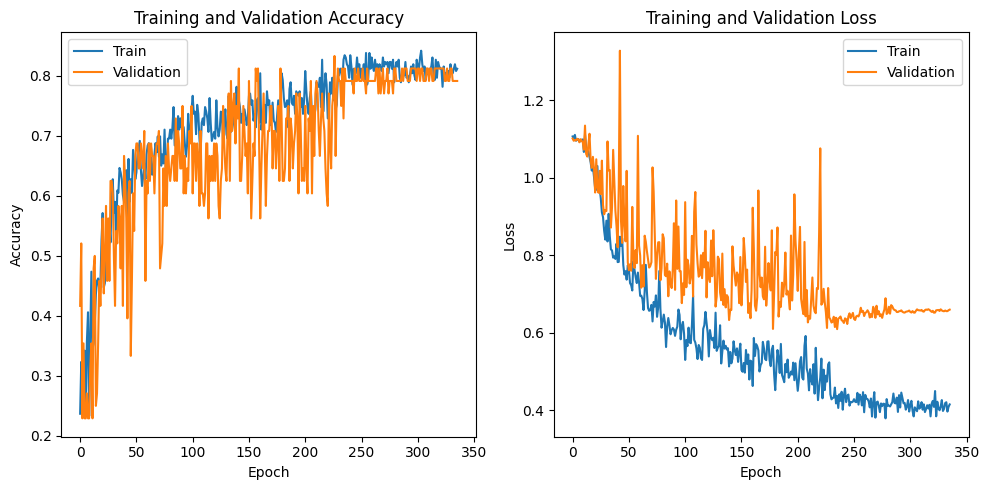

Test Accuracy: 0.48
Test Precision: 0.4805555555555556
Test Recall: 0.5666666666666667


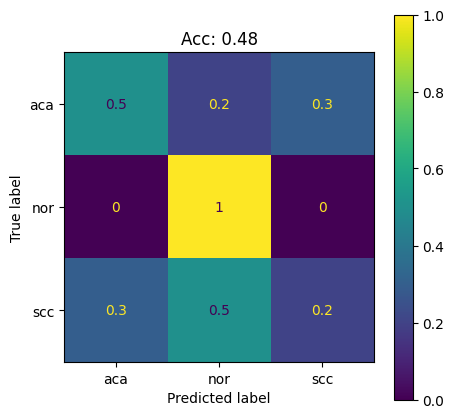

## Evaluating 20x resolution, 3 classes, exc pd False

  0%|          | 0/44 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_20x_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

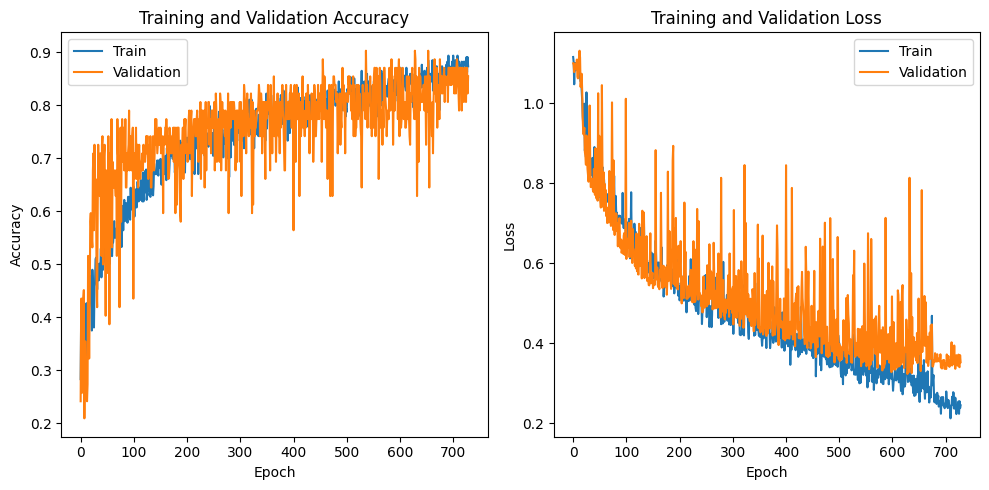

Test Accuracy: 0.5428571428571428
Test Precision: 0.6444444444444445
Test Recall: 0.6444444444444445


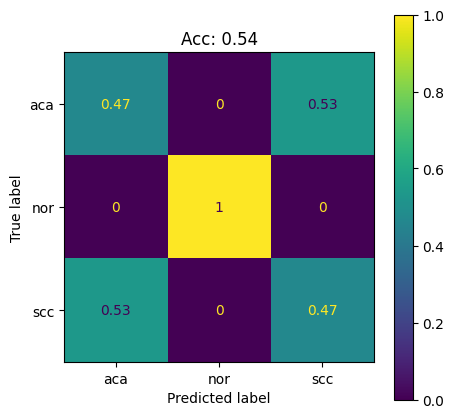

## Evaluating 20x resolution, 5 classes, exc pd True

  0%|          | 0/34 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_20x_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

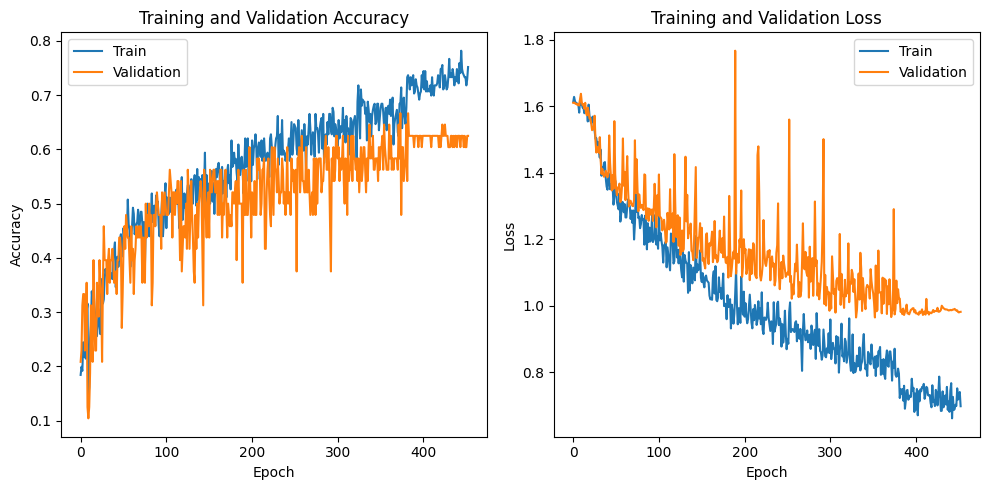

/opt/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.52
Test Precision: 0.3111111111111111
Test Recall: 0.52


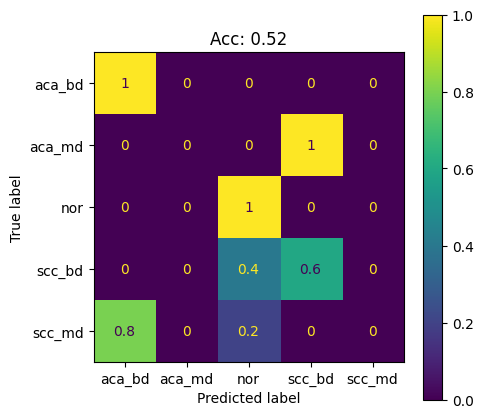

## Evaluating 20x resolution, 7 classes, exc pd False

  0%|          | 0/44 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_20x_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

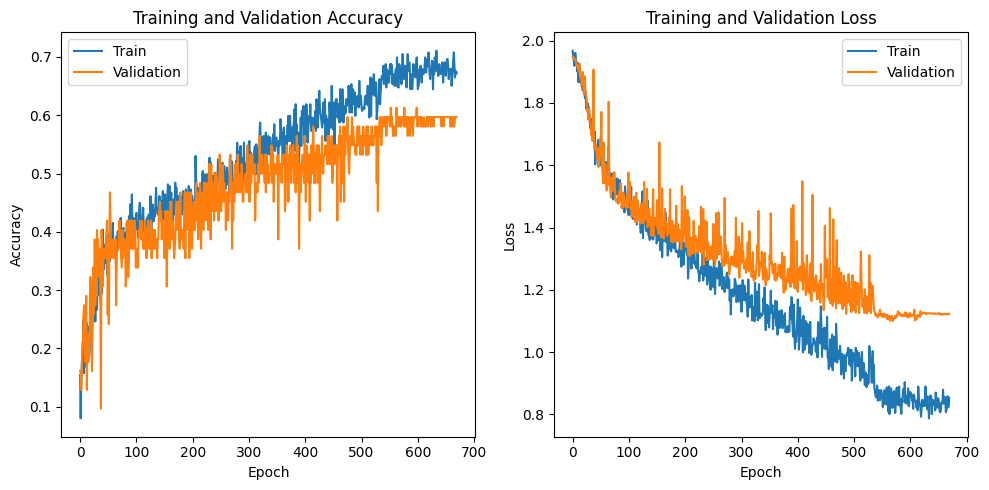

Test Accuracy: 0.37142857142857144
Test Precision: 0.24206349206349206
Test Recall: 0.37142857142857144


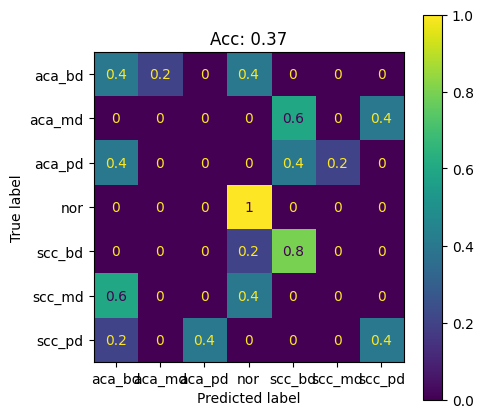

## Evaluating 40x resolution, 3 classes, exc pd True

  0%|          | 0/29 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_40x_3_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

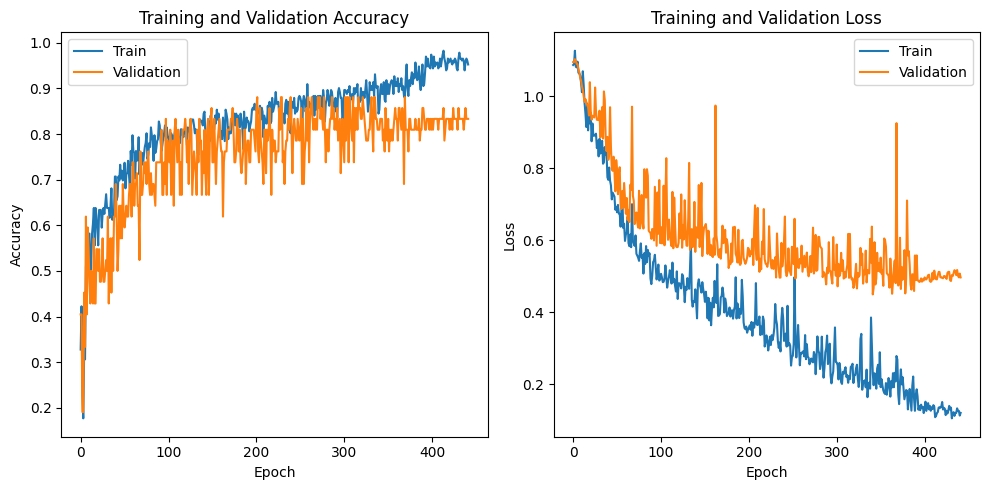

Test Accuracy: 0.56
Test Precision: 0.48333333333333334
Test Recall: 0.5


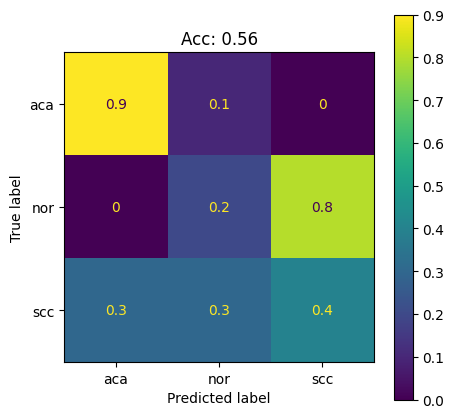

## Evaluating 40x resolution, 3 classes, exc pd False

  0%|          | 0/40 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_40x_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

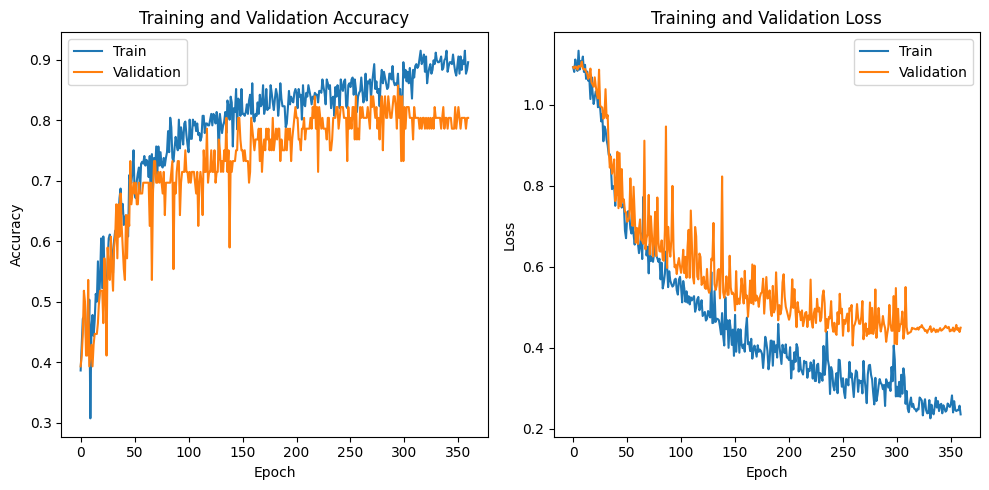

Test Accuracy: 0.5428571428571428
Test Precision: 0.508994708994709
Test Recall: 0.5111111111111112


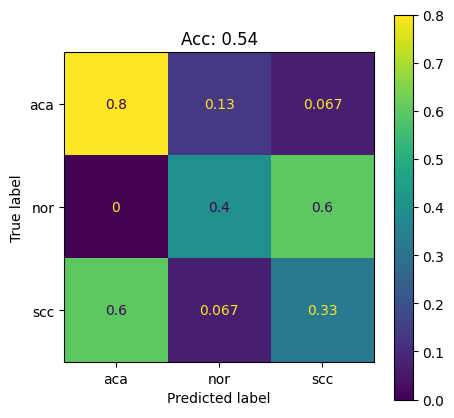

## Evaluating 40x resolution, 5 classes, exc pd True

  0%|          | 0/29 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_40x_5_classes_excpd1


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

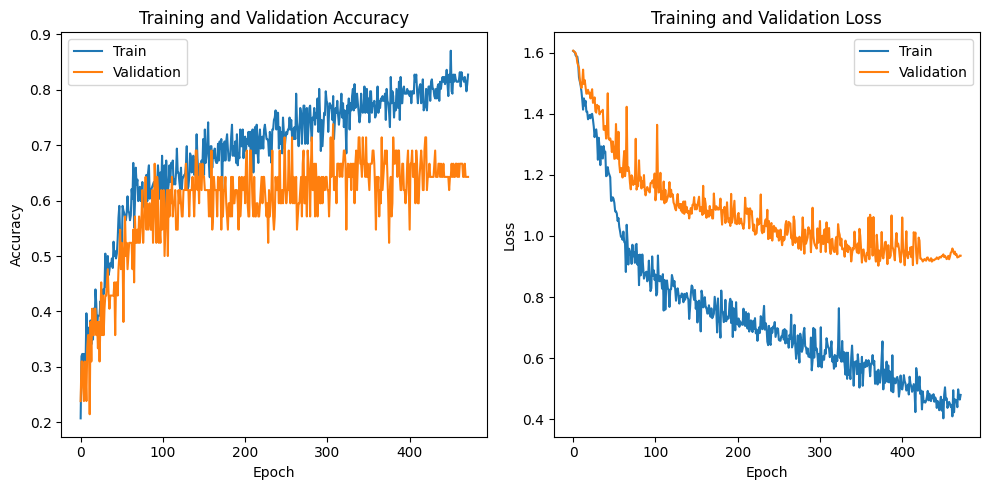

Test Accuracy: 0.68
Test Precision: 0.7642857142857142
Test Recall: 0.68


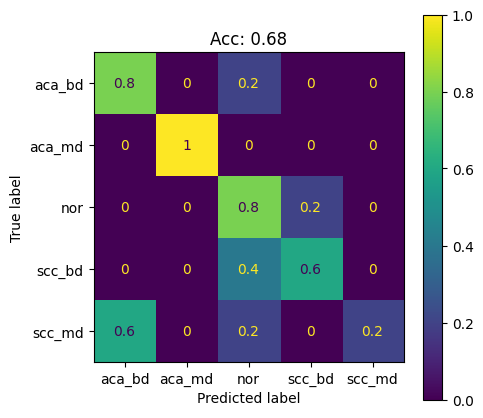

## Evaluating 40x resolution, 7 classes, exc pd False

  0%|          | 0/40 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_40x_7_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

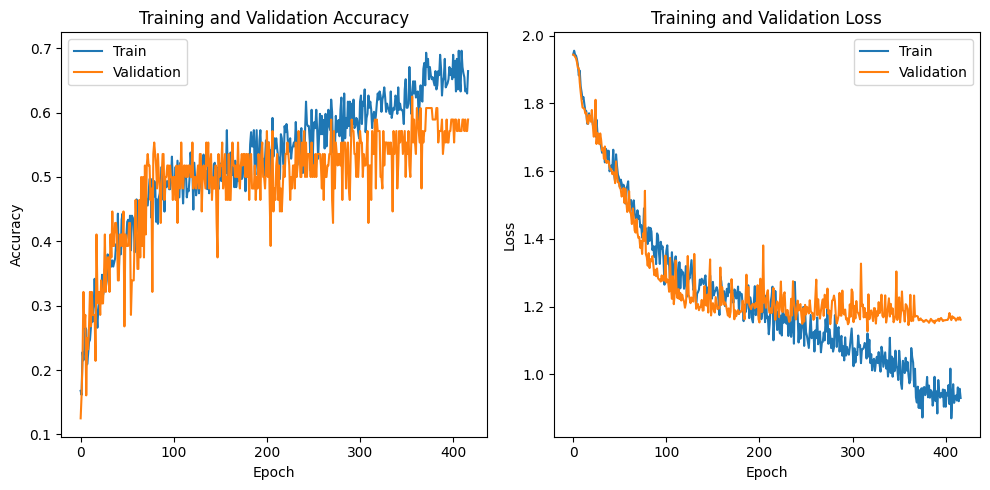

/opt/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.5142857142857142
Test Precision: 0.4603174603174603
Test Recall: 0.5142857142857143


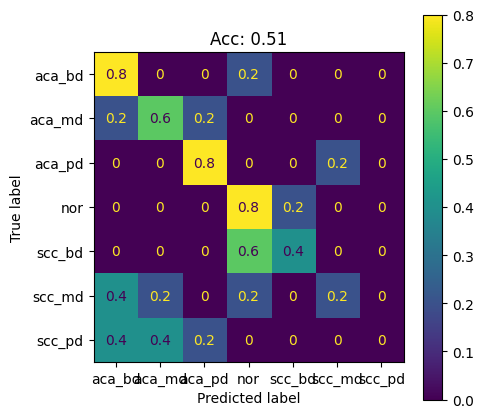

## Evaluating public resolution, 3 classes, exc pd False

  0%|          | 0/397 [00:00<?, ?it/s]

logs/20240109-122450/NewEf0_public_3_classes_excpd0


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
dtime = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
for resolution, classes, poco_dif in [('20x', ['macro','micro'], [True, False]), 
                                      ('40x', ['macro','micro'], [True, False]),                                 
                                      ('public', ['macro'], [False])]:
    for class_type in classes:
        for exclude_pd in poco_dif:
            # for pretrain_dir in pretrains:
            train_evaluate(class_type=class_type, resolution=resolution, exclude_pd=exclude_pd)